# Q1

###### import package

In [1]:
import numpy as np
import pandas as pd

######  read AutoMPG data

In [2]:
data = pd.read_csv(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\DA_Demo.csv")
X=data.drop(" car name",axis = 1).to_numpy()

###### define Factor Analysis function

In [3]:
def FA(dataMat, factor_number):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    selected_eigenvalue = eigVal[:factor_number]
    eigenvalues_diagonal = np.zeros((eigVal.shape[0], eigVal.shape[0]), float)   
    np.fill_diagonal(eigenvalues_diagonal, eigVal)
    eigenvalues_diagonal_total_sqrt = np.sqrt(eigenvalues_diagonal)
    All_T =   eigenvalues_diagonal_total_sqrt @ eigVect
    All = All_T.T
    X_variance = np.diag(np.diag(All_T @ All))
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigVal[:factor_number])
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_T = eigVect[:, :factor_number] @ eigenvalues_diagonal_sqrt
    A = A_T.T
    Psi = X_variance - A_T @ A
    Psi_inverse = np.linalg.inv(Psi)
    inner = np.linalg.inv(A @ (Psi_inverse) @ (A_T))
    F = dataMat @ Psi_inverse @ (A_T) @ (inner)
    communality_vector = A_T @ A  
    return F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue 

###### calling function

In [4]:
F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue = FA(X, 2)

###### find factor contribution percentage

In [5]:
Total_eigenvalues = eigVal.sum()
for i in range(0,len(selected_eigenvalue)):
    print("Factor",i+1,"contribute",format(selected_eigenvalue[i]*100/Total_eigenvalues,'2.2f'),"%")

Factor 1 contribute 99.75 %
Factor 2 contribute 0.21 %


###### compare to the PCA model, the explanation is almost alike, as the first factor(or component) has 99.75% explanation on variance

###### print out Factor matrix, Loading matrix, Communality Vector and Uniqueness Vector

In [6]:
print("\nFactor matrix:\n",F)
print("\nLoading matrix:\n",A)
print("\nCommunality Vector:\n",communality_vector)
print("\nUniqueness Vector:\n",Psi)


Factor matrix:
 [[ 4.11130246  2.56228537]
 [ 4.33721447  1.9724159 ]
 [ 4.03424091  2.04065671]
 [ 4.02873985  2.40165545]
 [ 4.046891    2.51429333]
 [ 5.10082817  1.84986084]
 [ 5.11978803  1.20602863]
 [ 5.06897722  1.45175908]
 [ 5.20236803  1.39365311]
 [ 4.5254432   1.37339716]
 [ 4.19121337  0.69306769]
 [ 4.23825085  1.98262172]
 [ 4.42314157  0.87559924]
 [ 3.64886693 -2.74096123]
 [ 2.76949913  4.2357598 ]
 [ 3.31663549  3.410327  ]
 [ 3.24835279  3.19962533]
 [ 3.03139445  2.6082012 ]
 [ 2.48633615  3.9188881 ]
 [ 2.14356974  3.05161488]
 [ 3.11702854  5.24978455]
 [ 2.83586279  4.57870528]
 [ 2.77168215  4.48308066]
 [ 2.61076533  3.57936837]
 [ 3.10208235  2.8178054 ]
 [ 5.40897057  4.50315445]
 [ 5.1238498   5.18236971]
 [ 5.13252015  4.89959836]
 [ 5.53636305  6.36829384]
 [ 2.48633619  3.91888912]
 [ 2.64803537  3.19342145]
 [ 2.60243038  3.79109518]
 [ 3.09072463  1.8914559 ]
 [ 4.02373385  4.55714732]
 [ 3.89966057  3.56151597]
 [ 3.8681887   3.4905834 ]
 [ 3.849493

# Q2

###### import package 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
from tkinter import _flatten

###### read data

In [2]:
X = np.zeros((400, 2576))
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        X[i+j*10] = image_array.flatten()

###### define Factor Analysis function

In [3]:
def FA(dataMat, factor_number):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    selected_eigenvalue = eigVal[:factor_number]
    eigenvalues_diagonal = np.zeros((eigVal.shape[0], eigVal.shape[0]), float)   
    np.fill_diagonal(eigenvalues_diagonal, eigVal)
    eigenvalues_diagonal_total_sqrt = np.sqrt(eigenvalues_diagonal)
    All_T =   eigenvalues_diagonal_total_sqrt @ eigVect
    All = All_T.T
    X_variance = np.diag(np.diag(All_T @ All))
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigVal[:factor_number])
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_T = eigVect[:, :factor_number] @ eigenvalues_diagonal_sqrt
    A = A_T.T
    Psi = X_variance - A_T @ A
    Psi_inverse = np.linalg.inv(Psi)
    inner = np.linalg.inv(A @ (Psi_inverse) @ (A_T))
    F = dataMat @ Psi_inverse @ (A_T) @ (inner)
    communality_vector = A_T @ A  
    return F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue 

###### define Factor Analysis function

In [8]:
def analyse_data(eigenvalues_selected, Total_eigenvalues):    
    Printed = 0
    cumulated_values = 0
    for i in range(0, len(eigenvalues_selected)):
        cumulated_values += eigenvalues_selected[i]
        if  60 > (cumulated_values/Total_eigenvalues*100).real > 50 and Printed == 0:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 1
        elif 70 > (cumulated_values/Total_eigenvalues*100).real > 60 and Printed == 1:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 2
        elif 80 > (cumulated_values/Total_eigenvalues*100).real > 70 and Printed == 2:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 3
        elif 90 > (cumulated_values/Total_eigenvalues*100).real > 80 and Printed == 3:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 4
        elif (cumulated_values/Total_eigenvalues*100).real > 90 and Printed == 4:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 5

###### call function

In [9]:
F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue = FA(X.T, 100)
analyse_data(selected_eigenvalue.real,eigVal.real.sum())

Principal components： 2, Variance percentage：10.55%, Cumulated percentage：57.0%
Principal components： 3, Variance percentage：4.57%, Cumulated percentage：61.5%
Principal components： 6, Variance percentage：2.07%, Cumulated percentage：70.5%
Principal components：15, Variance percentage：0.66%, Cumulated percentage：80.2%
Principal components：47, Variance percentage：0.17%, Cumulated percentage：90.1%


###### plot image when selecting 15 factors 

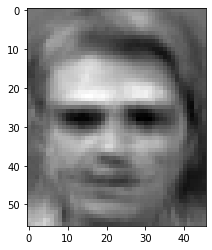

In [12]:
F, A,communality_vector, Psi,eigVal, eigVect, eigenvalues_selected = FA(X.T, 15)

first_PC = F@A
first_PC=first_PC.T[0]
first_PC_array=first_PC.reshape(56,46).real
min_first_PC_array = np.min(first_PC_array)
range_first_PC_array = np.max(first_PC_array) - np.min(first_PC_array)
for i, j in enumerate(first_PC_array):
    first_PC_array[i] = 255 * ((j - min_first_PC_array) / range_first_PC_array)
    
imgplot = plt.imshow(first_PC_array, cmap='gray', vmin=0, vmax=255)
plt.show()